# Bayesian Linear Regression (Solution to Assignment 1: Prob 6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Custom Functions

In [2]:
def createA(x, D):
    '''
    Creating matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model (polynomial)
    Output:
        A: np matrix of shape (N,D+1)
    '''
    N = len(x)
    A = np.zeros(shape=(N,D+1))
    for i in range(N):
        for j in range(D+1):
            A[i][j] = x[i]**j
            j=j+1
        i=i+1
    return A

def MLEtrain_w(A, y):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        y: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    nA = A.shape[0]
    mA = A.shape[1]
    A_Trans = np.transpose(A)
    ATPA = A_Trans@A
    AATP = A@A_Trans
    ATPA_inv = np.linalg.inv(ATPA)
    w = (ATPA_inv@A_Trans)@y
    return w

def Posteriortrain_w(A, y, beta, lamb):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
        beta: Noise Precision for Gaussian likelihood model of the output
        lamb: Noise Precision for Gaussian Prior model of the weights
    Output:
        posterior_mean: Mean of the posterior Distribution
        posterior_sigma: Covariance of the POsterior Distribution
    '''
    nA = A.shape[0]
    mA = A.shape[1]
    A_Trans = np.transpose(A)
    ATPA = A_Trans@A
    posterior_sigma = np.linalg.inv(beta*ATPA + lamb*np.eye(mA))
    posterior_mean = ((np.linalg.inv(ATPA + (lamb/beta)*np.eye(mA)))@A_Trans)@y
    
    return posterior_mean, posterior_sigma

def MultipleDegreePosterior(x,y,beta,lamb,degree):
    '''
    Inputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,)
        beta: Noise Precision for Gaussian likelihood model of the output
        lamb: Noise Precision for Gaussian Prior model of the weights
        degree: list of degree of polynomial we wish to fit e.g. degree = [1,2,3,4]
    Output:
        degree: list of degree of polynomial we wish to fit e.g. degree = [1,2,3,4]
        A: np matrix of shape (N,D+1)
        PWM: list of Mean of the posterior Distribution corresponding to each degree
        PWS: list of Covariance of the POsterior Distribution corresponding to each degree
    '''
    A = []
    PWM = []
    PWS = []
    for k in range(len(degree)):
        Amat = createA(x,degree[k])
        post_mean, post_cov = Posteriortrain_w(Amat, y,  beta, lamb)
        A += [Amat]
        PWM += [post_mean]
        PWS += [post_cov]
    return degree, A, PWM, PWS

def DrawSamplesMultivariateGaussian(deg, PWM, PWS, NoOfSample):
    WeightSamples = []
    for k in range(len(degree)):
        Samples = np.random.multivariate_normal(PWM[k], PWS[k], NoOfSample).T
        WeightSamples += [Samples]
    return WeightSamples

def GenerateFunctions(deg, A, WeightSamples, NoOfSample):
    Y_out = []
    for k in range(len(degree)):
        Y = A[k]@WeightSamples[k]
        Y_out += [Y]
    return Y_out

def GenerateLinspaceData(lowlim, uplim, NoOfPoint, degree):
    A_fab = []
    xdata = np.linspace(lowlim, uplim, num=NoOfPoint)
    for k in range(len(degree)):
        A_mat = createA(xdata, degree[k])
        A_fab += [A_mat]
    return A_fab, xdata

def GeneratePPD_MeanCovFunctions(deg, PWM, PWS, A_fab, beta, NoOfSample):
    Y_out = []
    Y_outVar = []
    for k in range(len(degree)):
        Y = A_fab[k]@PWM[k]
        Y_var = np.sqrt((A_fab[k]@(PWS[k]@A_fab[k].T)).diagonal() + (1/beta))
        Y_out += [Y]
        Y_outVar += [Y_var]
    return Y_out, Y_outVar

# Importing Data

In [3]:
# Input Data
x = np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

# Solution to Problem 6.1

In [4]:
# Solution 6.1

degree = [1,2,3,4]
beta = 4
lamb = 1
NoOfSample = 10

deg, A, PWM, PWS = MultipleDegreePosterior(x,y,beta,lamb,degree)
WeightSamples = DrawSamplesMultivariateGaussian(deg, PWM, PWS, NoOfSample)
A_fab, X_fab = GenerateLinspaceData(-4, 4, 50, degree)
Y_fabout = GenerateFunctions(deg, A_fab, WeightSamples, 50)

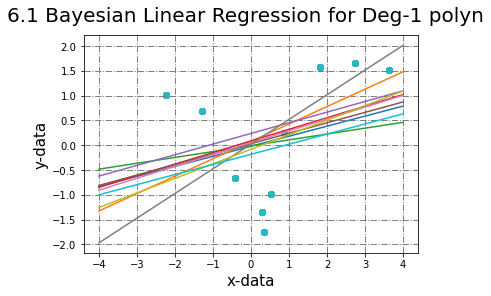

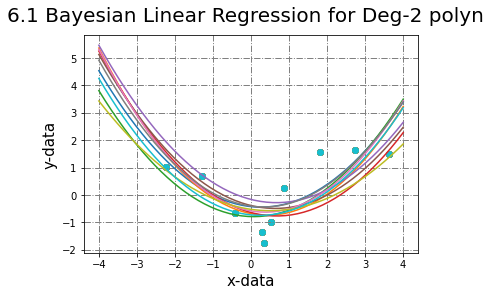

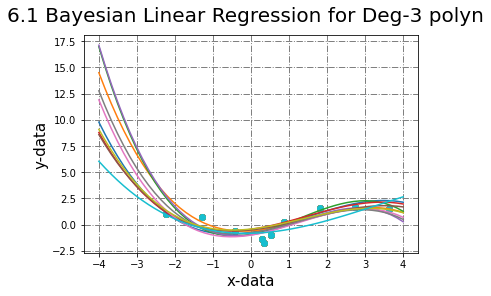

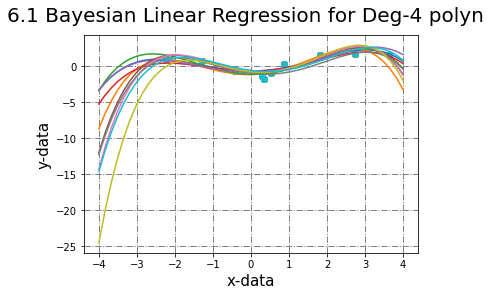

In [6]:
# Plotting Solution 6.1

no_of_paramset = 10
plot1 = plt.figure(1)
for i in range(no_of_paramset):
    plt.scatter(x,y)
    plt.plot(X_fab, Y_fabout[0][:,i])
    plt.xlabel('x-data', fontsize=15)
    plt.ylabel('y-data', fontsize=15)
    plt.suptitle('6.1 Bayesian Linear Regression for Deg-1 polyn', fontsize=20)
    plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plot1 = plt.figure(2)
for i in range(no_of_paramset):
    plt.scatter(x,y)
    plt.plot(X_fab, Y_fabout[1][:,i])
    plt.xlabel('x-data', fontsize=15)
    plt.ylabel('y-data', fontsize=15)
    plt.suptitle('6.1 Bayesian Linear Regression for Deg-2 polyn', fontsize=20)
    plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plot1 = plt.figure(3)
for i in range(no_of_paramset):
    plt.scatter(x,y)
    plt.plot(X_fab, Y_fabout[2][:,i])
    plt.xlabel('x-data', fontsize=15)
    plt.ylabel('y-data', fontsize=15)
    plt.suptitle('6.1 Bayesian Linear Regression for Deg-3 polyn', fontsize=20)
    plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plot1 = plt.figure(4)
for i in range(no_of_paramset):
    plt.scatter(x,y)
    plt.plot(X_fab, Y_fabout[3][:,i])
    plt.xlabel('x-data', fontsize=15)
    plt.ylabel('y-data', fontsize=15)
    plt.suptitle('6.1 Bayesian Linear Regression for Deg-4 polyn', fontsize=20)
    plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.show()

# Solution to Problem 6.2

In [7]:
# Solution 6.2

Y_PPD, Y_PPDVar = GeneratePPD_MeanCovFunctions(deg, PWM, PWS, A_fab, beta, NoOfSample)

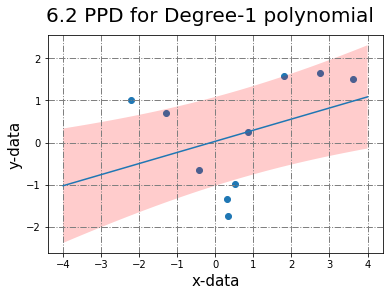

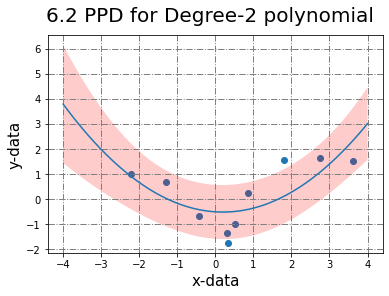

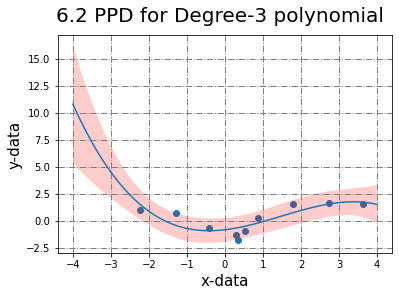

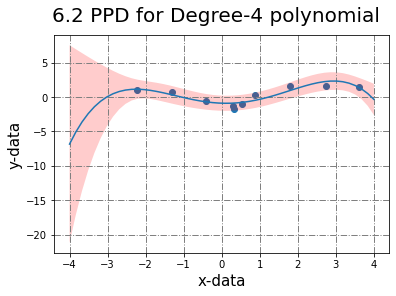

In [8]:
# Plotting Solution 6.2

plot1 = plt.figure(1)
plt.scatter(x,y)
plt.plot(X_fab,Y_PPD[0])
a1 = Y_PPD[0] - 2*Y_PPDVar[0]
a2 = Y_PPD[0] + 2*Y_PPDVar[0]
plt.fill_between(X_fab, a1, a2, facecolor='r', alpha=0.2)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('6.2 PPD for Degree-1 polynomial', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
    
plot1 = plt.figure(2)
plt.scatter(x,y)
plt.plot(X_fab,Y_PPD[1])
b1 = Y_PPD[1] - 2*Y_PPDVar[1]
b2 = Y_PPD[1] + 2*Y_PPDVar[1]
plt.fill_between(X_fab, b1, b2, facecolor='r', alpha=0.2)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('6.2 PPD for Degree-2 polynomial', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")

plot1 = plt.figure(3)
plt.scatter(x,y)
plt.plot(X_fab,Y_PPD[2])
c1 = Y_PPD[2] - 2*Y_PPDVar[2]
c2 = Y_PPD[2] + 2*Y_PPDVar[2]
plt.fill_between(X_fab, c1, c2, facecolor='r', alpha=0.2)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('6.2 PPD for Degree-3 polynomial', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")

plot1 = plt.figure(4)
plt.scatter(x,y)
plt.plot(X_fab,Y_PPD[3])
d1 = Y_PPD[3] - 2*Y_PPDVar[3]
d2 = Y_PPD[3] + 2*Y_PPDVar[3]
plt.fill_between(X_fab, d1, d2, facecolor='r', alpha=0.2)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('6.2 PPD for Degree-4 polynomial', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")

plt.show()

In [9]:
# Solution 6.3

from scipy.stats import multivariate_normal
for k in deg:
    x_mat = A[k-1] 
    marginal_likelihood = np.log(multivariate_normal.pdf(y, mean=np.zeros(NoOfSample), cov=((1/beta)*np.eye(NoOfSample) + x_mat @ x_mat.T)))
    print('For Degree =', k, 'Log marginal likelihood =', marginal_likelihood)

For Degree = 1 Log marginal likelihood = -32.35201528044561
For Degree = 2 Log marginal likelihood = -22.772153178782183
For Degree = 3 Log marginal likelihood = -22.07907064224421
For Degree = 4 Log marginal likelihood = -22.386776180348857


In [10]:
# Solution 6.4

from scipy.stats import multivariate_normal
for k in deg:
    x_mat = A[k-1] 
    cov_w = np.linalg.inv(beta * x_mat.T @ x_mat + np.eye(k+1)) 
    mean_w = beta * cov_w @ x_mat.T @ y 
    ans = np.log(multivariate_normal.pdf(y, mean=x_mat @ mean_w, cov=(1/beta)*np.eye(NoOfSample)))
    print('For Degree =', k, 'Log likelihood =', ans)

For Degree = 1 Log likelihood = -28.094004379075553
For Degree = 2 Log likelihood = -15.360663659052214
For Degree = 3 Log likelihood = -10.935846883615742
For Degree = 4 Log likelihood = -7.225291259028579


# Solution 1

In [1]:
# Solution 1

loc, scale = 0., 1.
s = np.random.normal(loc, scale, 1000)
count, bins, ignored = plt.hist(s, 100)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)

plot1 = plt.figure(1)
plt.plot(x, pdf)
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x|eta)', fontsize=15)
plt.suptitle('Q1 Gaussian', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.show()

NameError: name 'np' is not defined

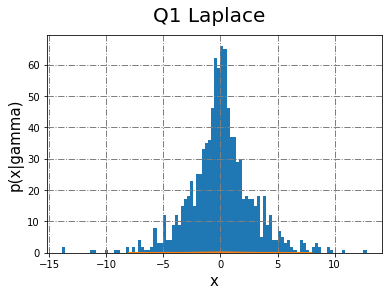

In [10]:
# Solution 1

loc, scale = 0., 1.
s = np.random.laplace(loc, scale, 1000)
count, bins, ignored = plt.hist(s, 100)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)

plot1 = plt.figure(1)
plt.plot(x, pdf)
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x|gamma)', fontsize=15)
plt.suptitle('Q1 Laplace', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")